In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
# 
fnCSVResTanh='results-all-in-one-Tanh.csv'
fnCSVResreLU='results-all-in-one-ReLU.csv'

In [3]:
dataTanh=pd.read_csv(fnCSVResTanh)
dataReLU=pd.read_csv(fnCSVResreLU)

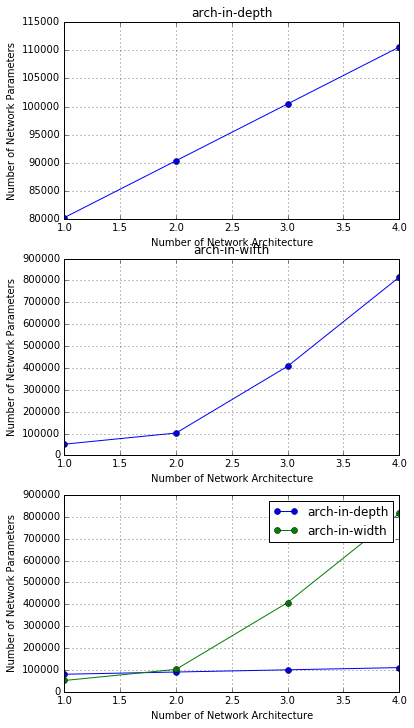

In [4]:
datay1=dataReLU[ (dataReLU['archType']==1) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numP']
datay2=dataReLU[ (dataReLU['archType']==2) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numP']
datax=range(1,len(datay1)+1)

plt.figure(figsize=(6,12))
plt.subplot(3,1,1)
plt.plot(datax,datay1,'o-')
plt.grid(True)
plt.xlabel('Number of Network Architecture')
plt.ylabel('Number of Network Parameters')
plt.title('arch-in-depth')
#
plt.subplot(3,1,2)
plt.plot(datax,datay2,'o-')
plt.grid(True)
plt.xlabel('Number of Network Architecture')
plt.ylabel('Number of Network Parameters')
plt.title('arch-in-wifth')
#
plt.subplot(3,1,3)
plt.hold(True)
plt.plot(datax,datay1,'o-')
plt.plot(datax,datay2,'o-')
plt.hold(False)
plt.grid(True)
plt.xlabel('Number of Network Architecture')
plt.ylabel('Number of Network Parameters')
plt.legend(['arch-in-depth', 'arch-in-width'])
plt.show()

In [5]:
dataReLU_InDepth=dataReLU[dataReLU['archType']==1]
dataTanh_InDepth=dataTanh[dataTanh['archType']==1]
dataReLU_InWidth=dataReLU[dataReLU['archType']==2]
dataTanh_InWidth=dataTanh[dataTanh['archType']==2]
#
arrNumP_InDepth=dataReLU[ (dataReLU['archType']==1) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numP']
arrNumP_InWidth=dataReLU[ (dataReLU['archType']==2) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numP']
#
arrNumN_InWidth=dataReLU[ (dataReLU['archType']==2) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numN']
arrNumEpoch=dataReLU[ (dataReLU['archType']==1) & (dataReLU['Model']=='Keras') & (dataReLU['numL']==1)]['numEpoch']
#
arrFrmNames=dataTanh['Model'].unique()
#
arrNumEpoch=[10]

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


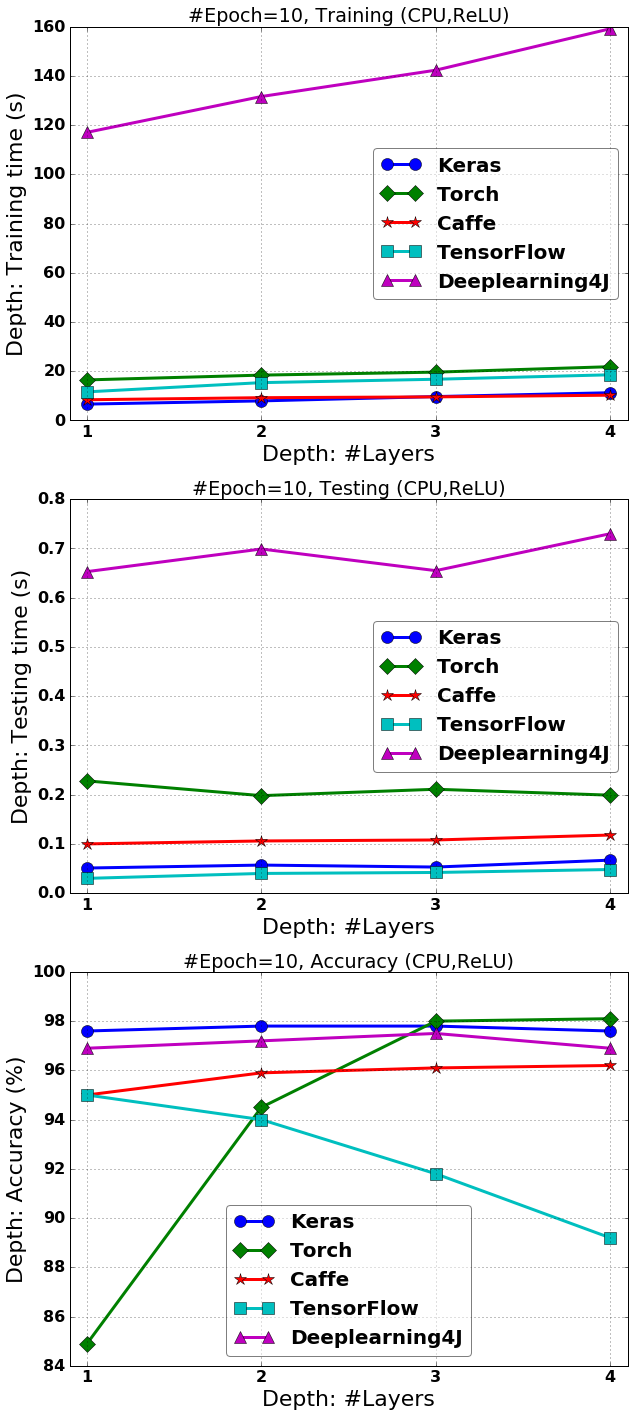

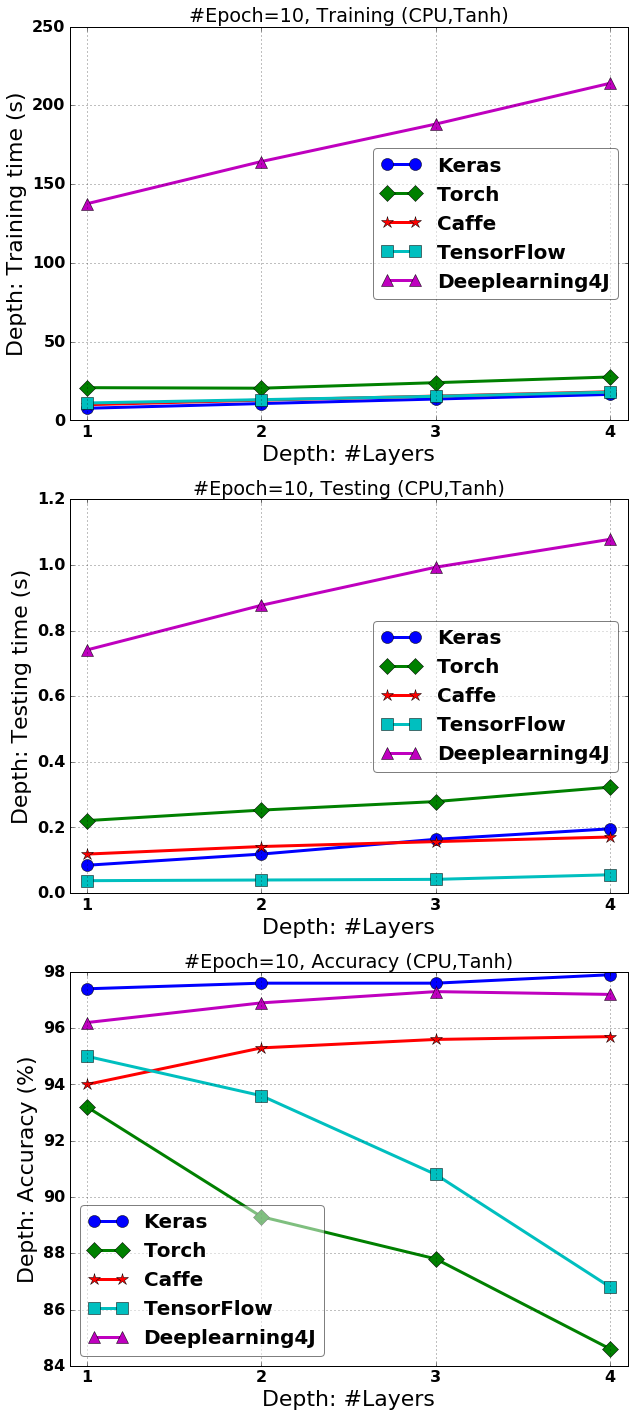

In [6]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font)
lstLineStyle=['-o', '-D', '-*', '-s','-^']

# Time&ACC from numL
# (1) Select nonlinear function, and draw plots
# nonlinFun='Tanh'
# nonlinFun='ReLU'
lstNonLinFun=['ReLU', 'Tanh']
strNetType="Depth"

for nonlinFun in lstNonLinFun:
    numNumEpoch=len(arrNumEpoch)
    # plt.figure(figsize=(8,20))
    parFigSize=(10,24)
    parDontSizeLegend=20
    parLabelSize=22
    fimgFigOut='Plot3x1_InDeth_%s.png' % nonlinFun
    plt.figure(figsize=parFigSize)
    for ei,numEpoch in enumerate(arrNumEpoch):
        lstLegend=[]
        lstData=[]
        for i,ii in enumerate(arrFrmNames):
            if nonlinFun=='Tanh':
                tmpData=dataTanh_InDepth[ (dataTanh_InDepth['Model']==ii)&(dataTanh_InDepth['numEpoch']==numEpoch)]
                tmpData2=tmpData[['numL','timeTrainMean','timeTestMean','accMean']].as_matrix().T
            else:
                tmpData=dataReLU_InDepth[ (dataReLU_InDepth['Model']==ii)&(dataReLU_InDepth['numEpoch']==numEpoch)]
                tmpData2=tmpData[['numL','timeTrainMean','timeTestMean','accMean']].as_matrix().T
            lstLegend.append(ii)
            lstData.append(tmpData2)
        #
    #     plt.figure(figsize=parFigSize)
        plt.subplot(3,numNumEpoch,numNumEpoch*ei+1)
        plt.hold(True)
        for tti,tt in enumerate(lstData):
            plt.plot(tt[0,:], tt[1,:],lstLineStyle[tti],linewidth=3.0, markersize=12)
        plt.xticks(tt[0,:].astype(np.int))
        plt.legend(lstLegend, fontsize=parDontSizeLegend, loc='best', fancybox=True, framealpha=0.5)
        plt.hold(False)
        plt.xlabel('%s: #Layers' % strNetType, fontsize=parLabelSize)
        plt.ylabel('%s: Training time (s)' % strNetType, fontsize=parLabelSize)
        plt.xlim((np.min(tt[0,:])-0.1,np.max(tt[0,:])+0.1))
        plt.grid(True)
        plt.title("#Epoch=%d, Training (CPU,%s)" % (numEpoch,nonlinFun))
        #
    #     plt.figure(figsize=parFigSize)
        plt.subplot(3,numNumEpoch,numNumEpoch*ei+2)
        plt.hold(True)
        for tti,tt in enumerate(lstData):
            plt.plot(tt[0,:], tt[2,:],lstLineStyle[tti],linewidth=3.0, markersize=12)
        plt.xticks(tt[0,:].astype(np.int))
        plt.legend(lstLegend, fontsize=parDontSizeLegend, loc='best', fancybox=True, framealpha=0.5)
        plt.hold(False)
        plt.xlabel('%s: #Layers' % strNetType, fontsize=parLabelSize)
        plt.ylabel('%s: Testing time (s)' % strNetType, fontsize=parLabelSize)
        plt.xlim((np.min(tt[0,:])-0.1,np.max(tt[0,:])+0.1))
        plt.grid(True)
        plt.title("#Epoch=%d, Testing (CPU,%s)" % (numEpoch,nonlinFun))
        #
    #     plt.figure(figsize=parFigSize)
        plt.subplot(3,numNumEpoch,numNumEpoch*ei+3)
        plt.hold(True)
        for tti,tt in enumerate(lstData):
            plt.plot(tt[0,:], 100.*tt[3,:],lstLineStyle[tti],linewidth=3.0, markersize=12)
        plt.xticks(tt[0,:].astype(np.int))
        plt.legend(lstLegend, fontsize=parDontSizeLegend, loc='best', fancybox=True, framealpha=0.5)
        plt.hold(False)
        plt.xlabel('%s: #Layers' % strNetType, fontsize=parLabelSize)
        plt.ylabel('%s: Accuracy (%%)' % strNetType, fontsize=parLabelSize)
        plt.xlim((np.min(tt[0,:])-0.1,np.max(tt[0,:])+0.1))
        plt.grid(True)
        plt.title("#Epoch=%d, Accuracy (CPU,%s)" % (numEpoch,nonlinFun))
    plt.savefig(fimgFigOut)

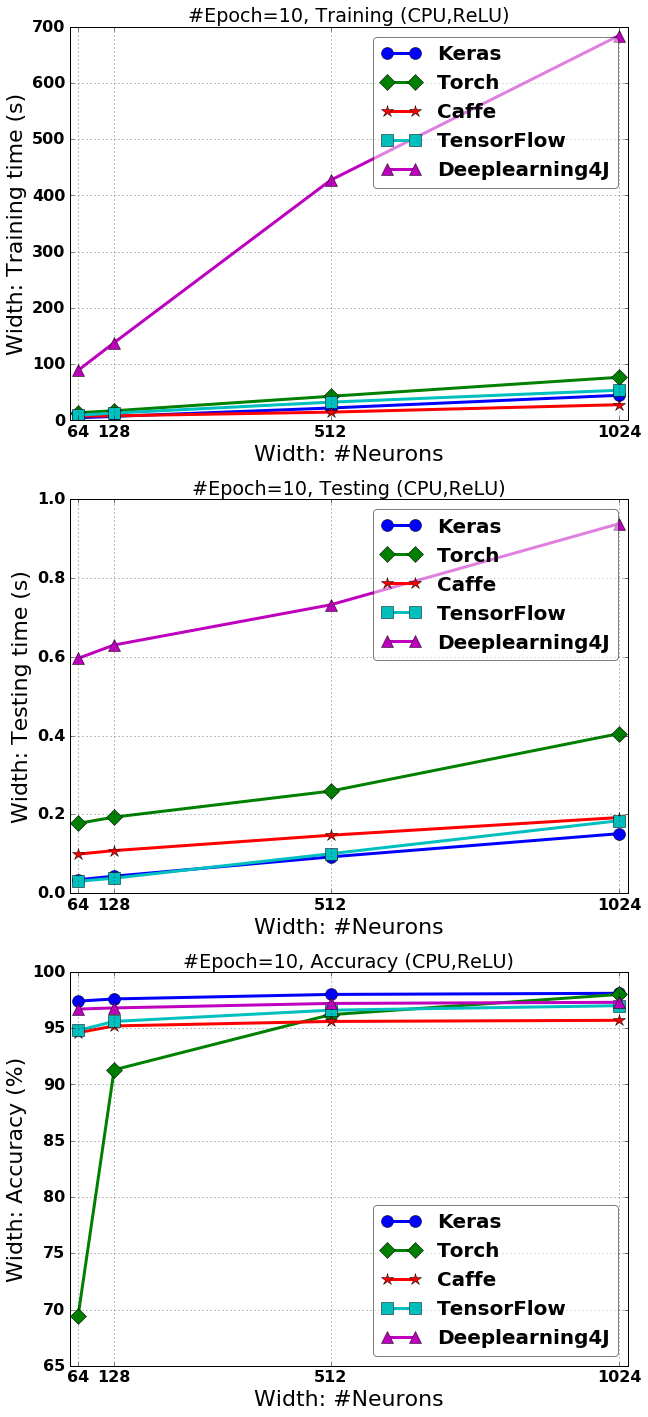

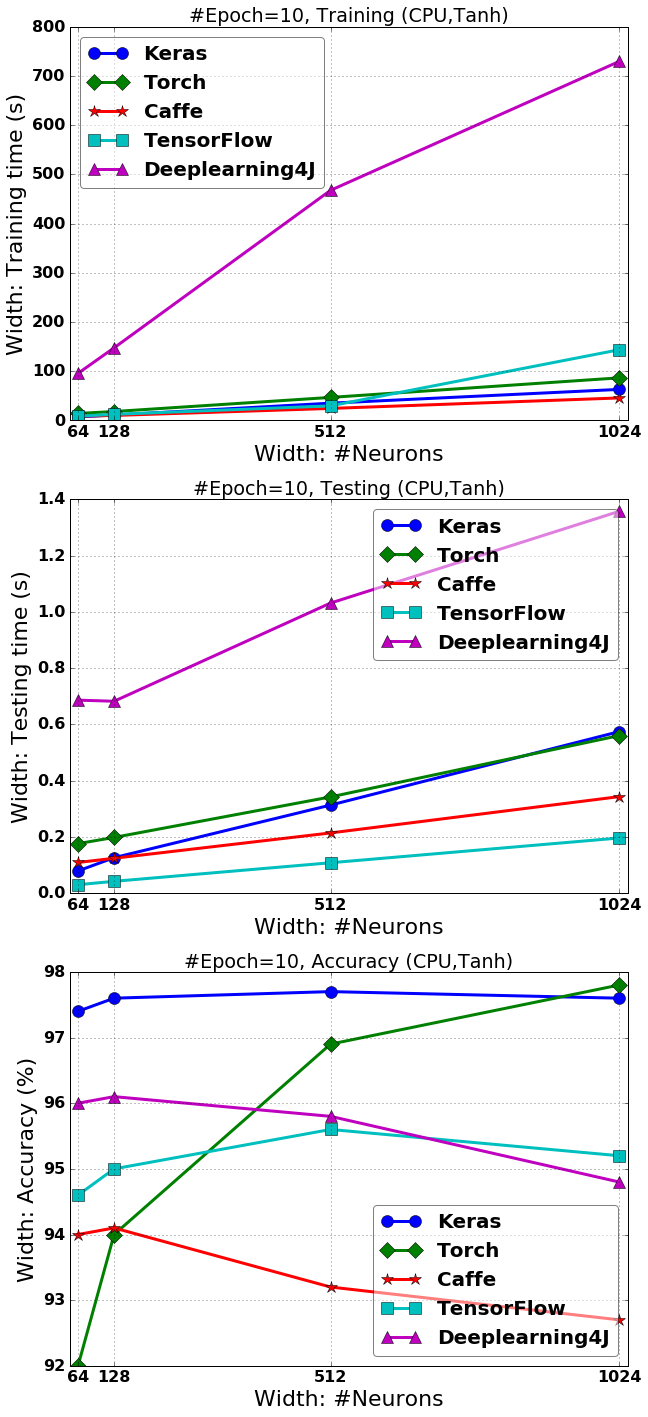

In [8]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font)
lstLineStyle=['-o', '-D', '-*', '-s','-^']

# Time&ACC from numN
# (1) Select nonlinear function, and draw plots
# nonlinFun='Tanh'
# nonlinFun='ReLU'
lstNonLinFun=['ReLU', 'Tanh']
strNetType="Width"

for nonlinFun in lstNonLinFun:
    numNumEpoch=len(arrNumEpoch)
    # plt.figure(figsize=(18,22))
    parFigSize=(10,24)
    parDontSizeLegend=20
    parLabelSize=22
    fimgFigOut='Plot3x1_InWidth_%s.png' % nonlinFun
    plt.figure(figsize=parFigSize)
    for ei,numEpoch in enumerate(arrNumEpoch):
        lstLegend=[]
        lstData=[]
        for i,ii in enumerate(arrFrmNames):
            if nonlinFun=='Tanh':
                tmpData=dataTanh_InWidth[ (dataTanh_InWidth['Model']==ii)&(dataTanh_InWidth['numEpoch']==numEpoch)]
                tmpData2=tmpData[['numN','timeTrainMean','timeTestMean','accMean']].as_matrix().T
            else:
                tmpData=dataReLU_InWidth[ (dataReLU_InWidth['Model']==ii)&(dataReLU_InWidth['numEpoch']==numEpoch)]
                tmpData2=tmpData[['numN','timeTrainMean','timeTestMean','accMean']].as_matrix().T
            lstLegend.append(ii)
            lstData.append(tmpData2)
        #
    #     plt.figure(figsize=parFigSize)
        plt.subplot(3,numNumEpoch,numNumEpoch*ei+1)
        plt.hold(True)
        for tti,tt in enumerate(lstData):
            plt.plot(tt[0,:], tt[1,:],lstLineStyle[tti],linewidth=3.0, markersize=12)
        plt.xticks(tt[0,:].astype(np.int))
        plt.legend(lstLegend, fontsize=parDontSizeLegend, loc='best', fancybox=True, framealpha=0.5)
        plt.hold(False)
        plt.xlabel('%s: #Neurons' % strNetType, fontsize=parLabelSize)
        plt.ylabel('%s: Training time (s)' % strNetType, fontsize=parLabelSize)
        plt.xlim((np.min(tt[0,:])-15,np.max(tt[0,:])+15))
        plt.grid(True)
        plt.title("#Epoch=%d, Training (CPU,%s)" % (numEpoch,nonlinFun))
        #
    #     plt.figure(figsize=parFigSize)
        plt.subplot(3,numNumEpoch,numNumEpoch*ei+2)
        plt.hold(True)
        for tti,tt in enumerate(lstData):
            plt.plot(tt[0,:], tt[2,:],lstLineStyle[tti],linewidth=3.0, markersize=12)
        plt.xticks(tt[0,:].astype(np.int))
        plt.legend(lstLegend, fontsize=parDontSizeLegend, loc='best', fancybox=True, framealpha=0.5)
        plt.hold(False)
        plt.xlabel('%s: #Neurons' % strNetType, fontsize=parLabelSize)
        plt.ylabel('%s: Testing time (s)' % strNetType, fontsize=parLabelSize)
        plt.xlim((np.min(tt[0,:])-15,np.max(tt[0,:])+15))
        plt.grid(True)
        plt.title("#Epoch=%d, Testing (CPU,%s)" % (numEpoch,nonlinFun))
        #
    #     plt.figure(figsize=parFigSize)
        plt.subplot(3,numNumEpoch,numNumEpoch*ei+3)
        plt.hold(True)
        for tti,tt in enumerate(lstData):
            plt.plot(tt[0,:], 100.*tt[3,:],lstLineStyle[tti],linewidth=3.0, markersize=12)
        plt.xticks(tt[0,:].astype(np.int))
        plt.legend(lstLegend, fontsize=parDontSizeLegend, loc='best', fancybox=True, framealpha=0.5)
        plt.hold(False)
        plt.xlabel('%s: #Neurons' % strNetType, fontsize=parLabelSize)
        plt.ylabel('%s: Accuracy (%%)' % strNetType, fontsize=parLabelSize)
        plt.xlim((np.min(tt[0,:])-15,np.max(tt[0,:])+15))
        plt.grid(True)
        plt.title("#Epoch=%d, Accuracy (CPU,%s)" % (numEpoch,nonlinFun))
    plt.savefig(fimgFigOut)

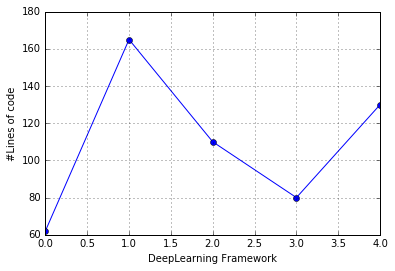

In [112]:
arrFrmNames
arrCodeLineNum=[62,165,110,80,130]
plt.figure()
plt.plot(arrCodeLineNum, '-o')
plt.xlabel('DeepLearning Framework')
plt.ylabel('#Lines of code')
plt.yticks(arrFrmNames)
plt.grid(True)